# Double check that bio component is working as intended

June, 2019

In [27]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
from pylab import *
import matplotlib
import warnings
import pickle
warnings.filterwarnings("ignore")

%matplotlib notebook

In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
folder   = '/data/brogalla/run_storage/'
bio      = 'bdy-S-sed_2019-06-24T131045.806557-0400/'
no_bio   = 'bdy-S-sed-nobio_2019-06-24T131116.040196-0400/'
file     = 'ANHA12_EXH006_5d_20020101_20021231_ptrc_T_20020101-20020105.nc'

Check fday files:

In [3]:
bio    = nc.Dataset(folder+bio+file)
no_bio = nc.Dataset(folder+no_bio+file)

FileNotFoundError: [Errno 2] No such file or directory: b'/data/brogalla/run_storage/bdy-S-sed_2019-06-24T131045.806557-0400/ANHA12_EXH006_5d_20020101_20021231_ptrc_T_20020101-20020105.nc'

In [4]:
dmn_bio     = np.array(bio.variables['dissolmn'])
dmn_no_bio  = np.array(no_bio.variables['dissolmn'])

AttributeError: 'str' object has no attribute 'variables'

In [8]:
diff_bio = dmn_bio-dmn_no_bio

In [9]:
print(np.amax(diff_bio), np.amin(diff_bio), np.average(diff_bio))

0.0 0.0 0.0


In [10]:
print(np.amax(dmn_bio), np.amin(dmn_bio))
print(np.amax(dmn_no_bio), np.amin(dmn_no_bio))

1.0024871e-08 0.0
1.0024871e-08 0.0


In [23]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
tmask = tmask[0,:,1480:2050,180:820]

In [24]:
ref   = nc.Dataset('/data/brogalla/ANHA12/2015/ANHA12-EXH006_y2015m01d05_gridT.nc')
lons  = np.array(ref.variables['nav_lon'])
lats  = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

<IPython.core.display.Javascript object>


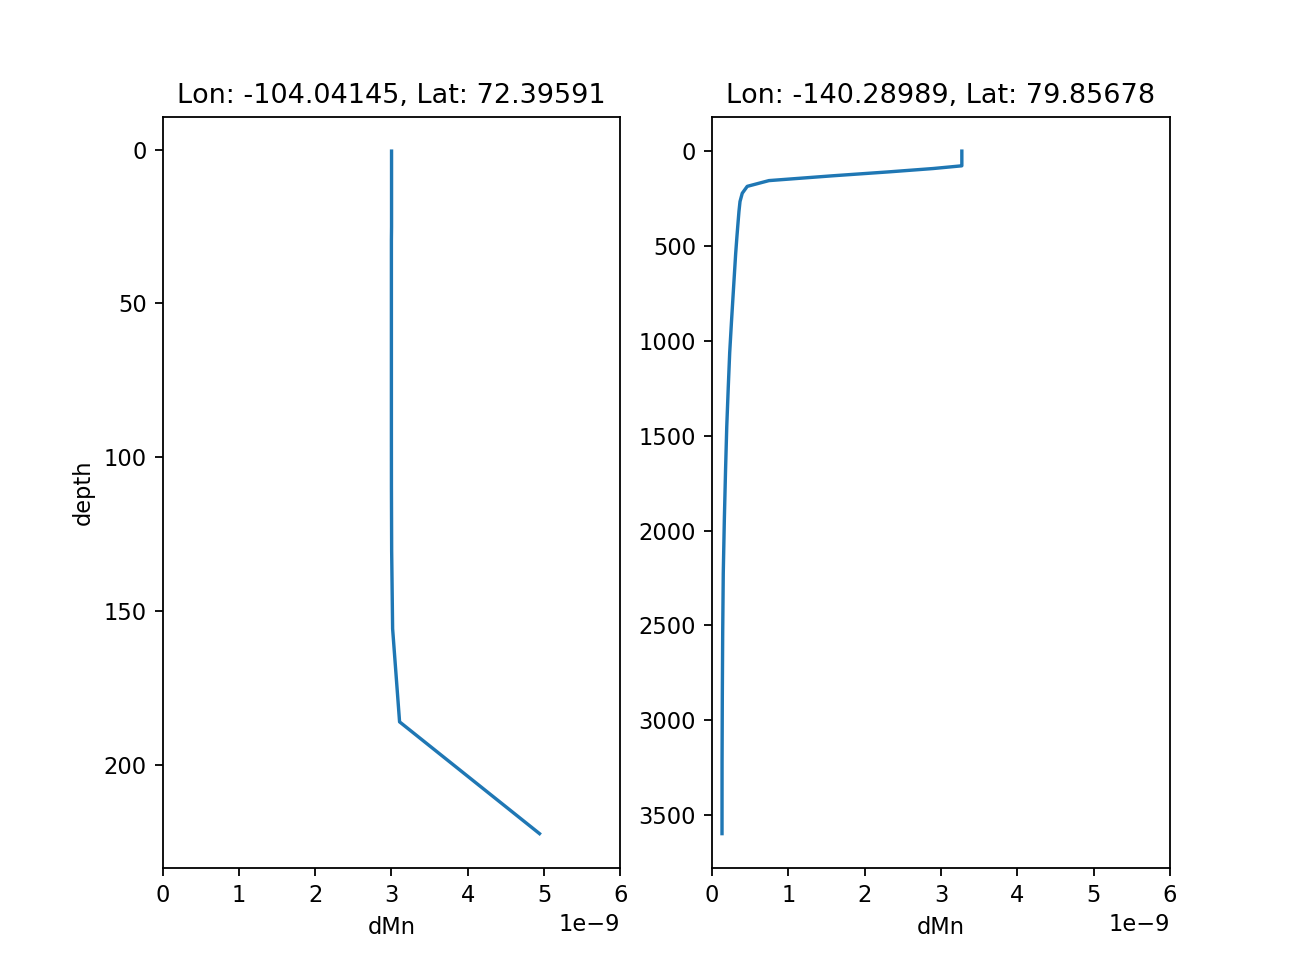

(0, 6e-09)

In [92]:
fig, ax = plt.subplots(1,2,figsize=(8,6))
sed = np.ma.masked_where((tmask[:,287,200] < 0.1), dmn_sed[0,:,287,200]) 
ax[0].plot(sed, depth)
ax[0].invert_yaxis()
ax[0].set_ylabel('depth')
ax[0].set_xlabel('dMn')
ax[0].set_title('Lon: '+ str(lons[1767,380]) + ', Lat: ' + str(lats[1767,380]))
ax[0].set_xlim([0, 6e-9])
#1777

sed2 = np.ma.masked_where((tmask[:,495,500] < 0.1), dmn_sed[0,:,495,500]) 
ax[1].plot(sed2, depth)
ax[1].invert_yaxis()
ax[1].set_xlabel('dMn')
ax[1].set_title('Lon: '+ str(lons[1977,680]) + ', Lat: ' + str(lats[1975,680]))
ax[1].set_xlim([0, 6e-9])

<IPython.core.display.Javascript object>


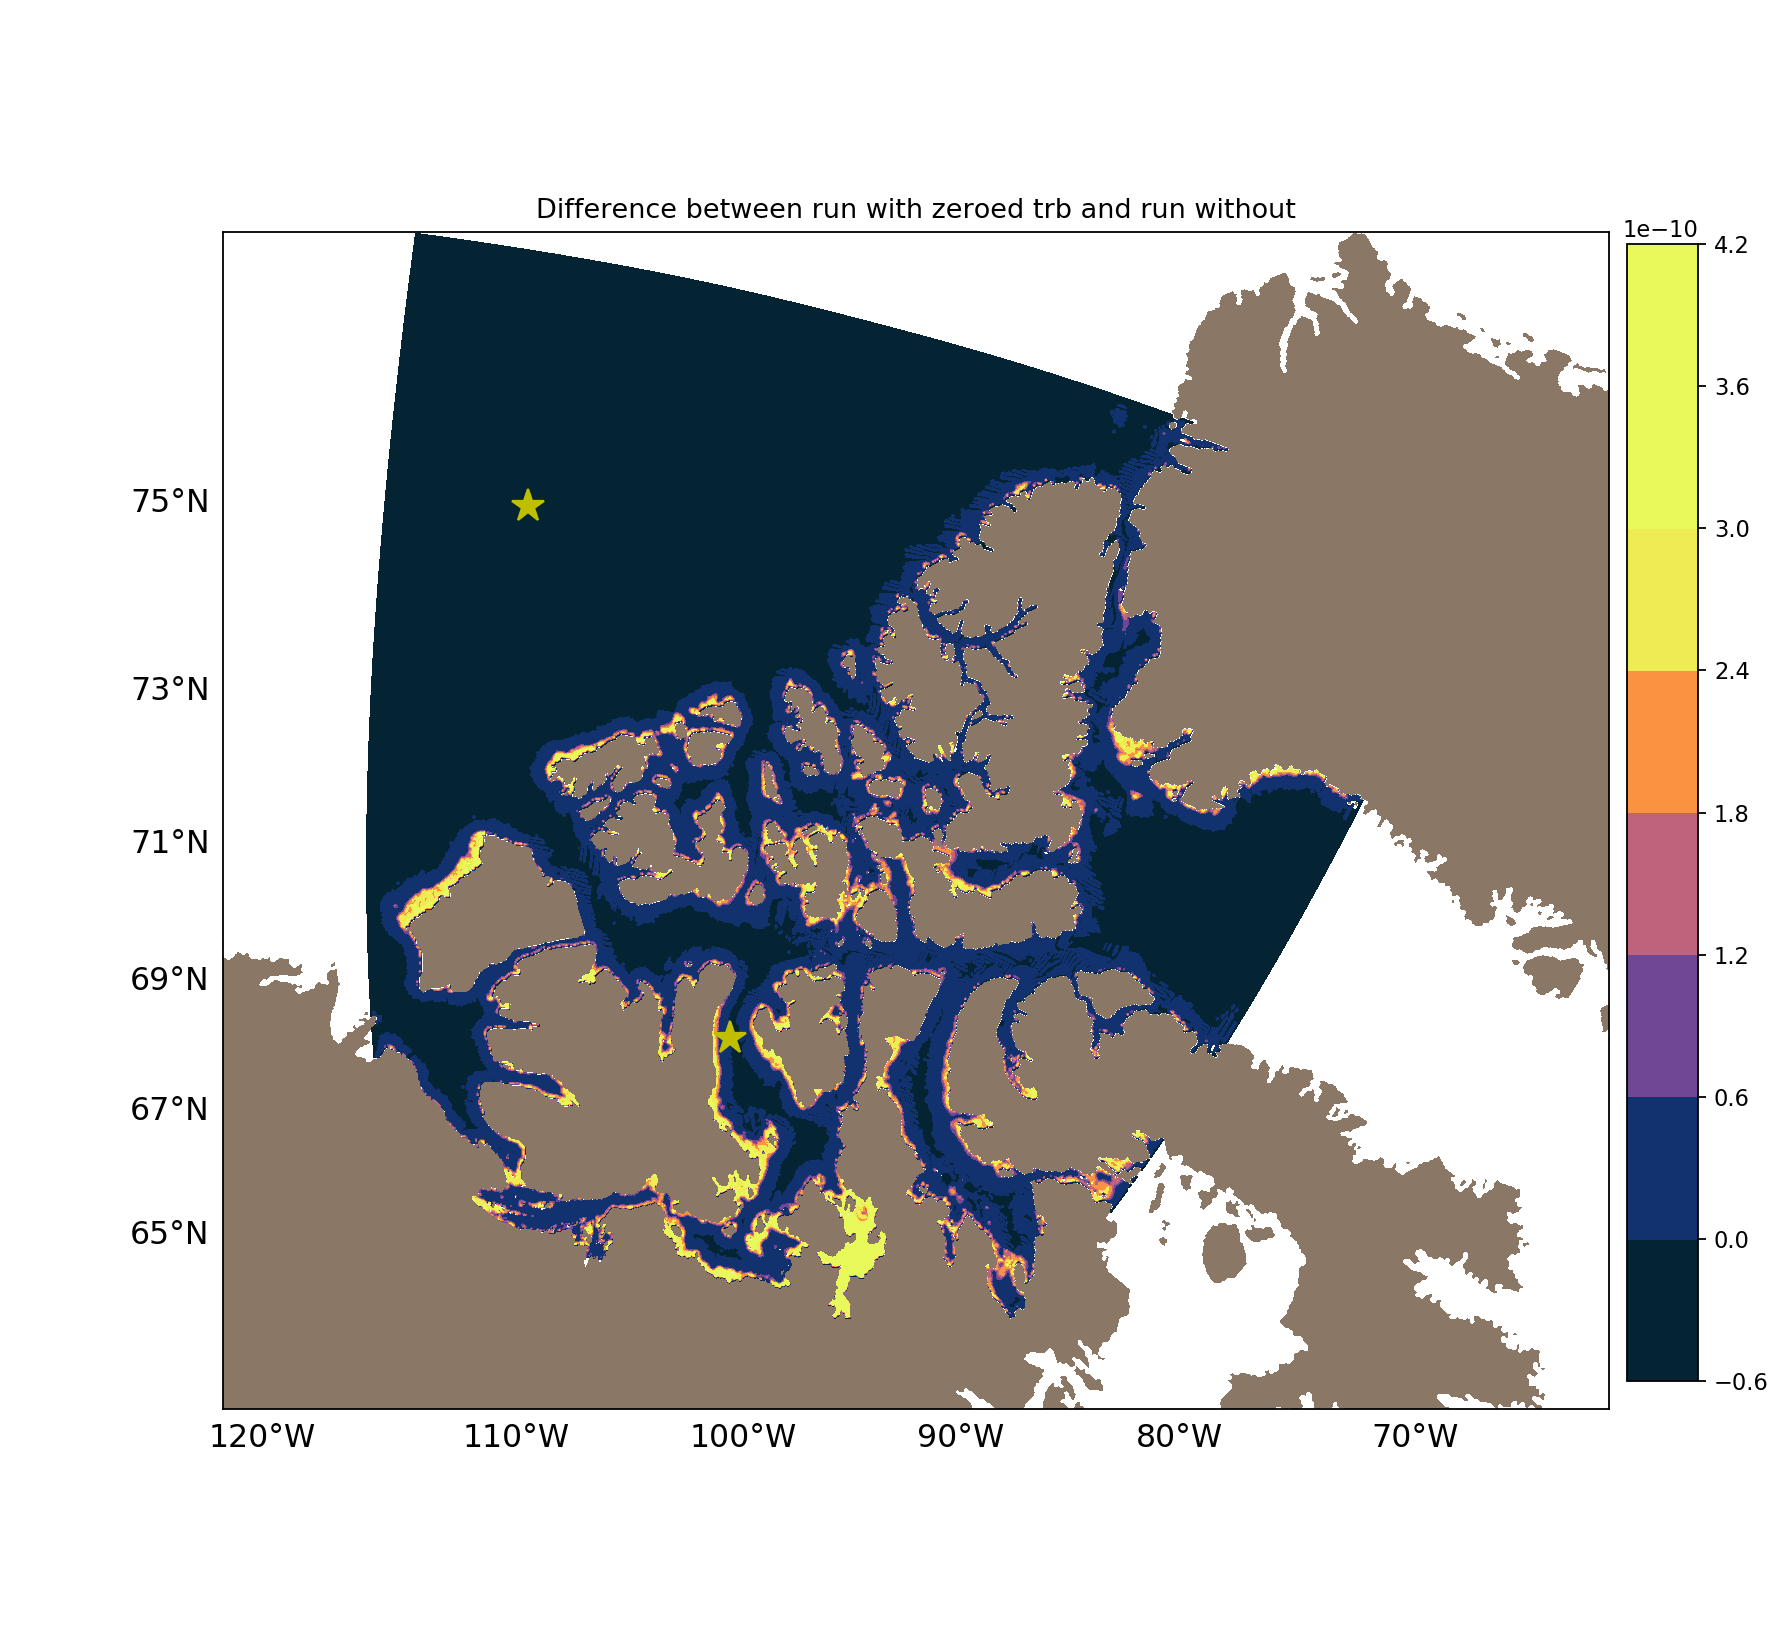

In [91]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons[1480:2050,180:820], lats[1480:2050,180:820])

var = np.ma.masked_where((tmask[0,:,:] < 0.1), diff_sed[0,0,:,:]) 

# clevels=[0, 0.25e-9, 0.5e-9, 0.75e-9, 1e-9, 1.25e-9, 1.5e-9, 1.75e-9, 2e-9, \
#          2.25e-9, 2.5e-9, 2.75e-9, 3e-9, 3.25e-9, 3.5e-9, 3.75e-9, 4e-9]
cbar = proj.contourf(x, y, var, cmap=cmocean.cm.thermal,vmin=0, vmax=2.8e-10, zorder=1)

x_star, y_star = proj(lons[1767,380], lats[1767,380])
proj.plot(x_star, y_star, '*', markersize=15, c='y', zorder=3)

x_star1, y_star1 = proj(lons[1975,680], lats[1975,680])
proj.plot(x_star1, y_star1, '*', markersize=15, c='y', zorder=3)

plt.title('Difference between run with zeroed trb and run without')

fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

In [58]:
dbio = nc.Dataset('/ocean/brogalla/GEOTRACES/data/dNO3_y2002m01_new.nc', 'r')

In [59]:
dbio

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): x(120000), y(1632)
    variables(dimensions): float64 dNO3(y,x)
    groups: 

In [54]:
dbio.createDimension('x',50*2400)
dbio.createDimension('y',1632)
dNn = dbio.createVariable('dNO3', 'float64', ('y','x'))
dNn[:] = dNO3_new

In [57]:
dbio.close()

In [44]:
dNO3_new = np.array(dNO3).reshape(50*2400, 1632)

In [60]:
dNO3 = dbio.variables['dNO3']

In [61]:
dNO3

<class 'netCDF4._netCDF4.Variable'>
float64 dNO3(y, x)
unlimited dimensions: 
current shape = (1632, 120000)
filling on, default _FillValue of 9.969209968386869e+36 used

In [37]:
print(dNO3.shape)
print(np.amax(dNO3), np.amin(dNO3), np.average(dNO3))

(120000, 1632)
4.623729347496773e-06 -4.0117892396836055e-06 1.4331825734761585e-08


<IPython.core.display.Javascript object>


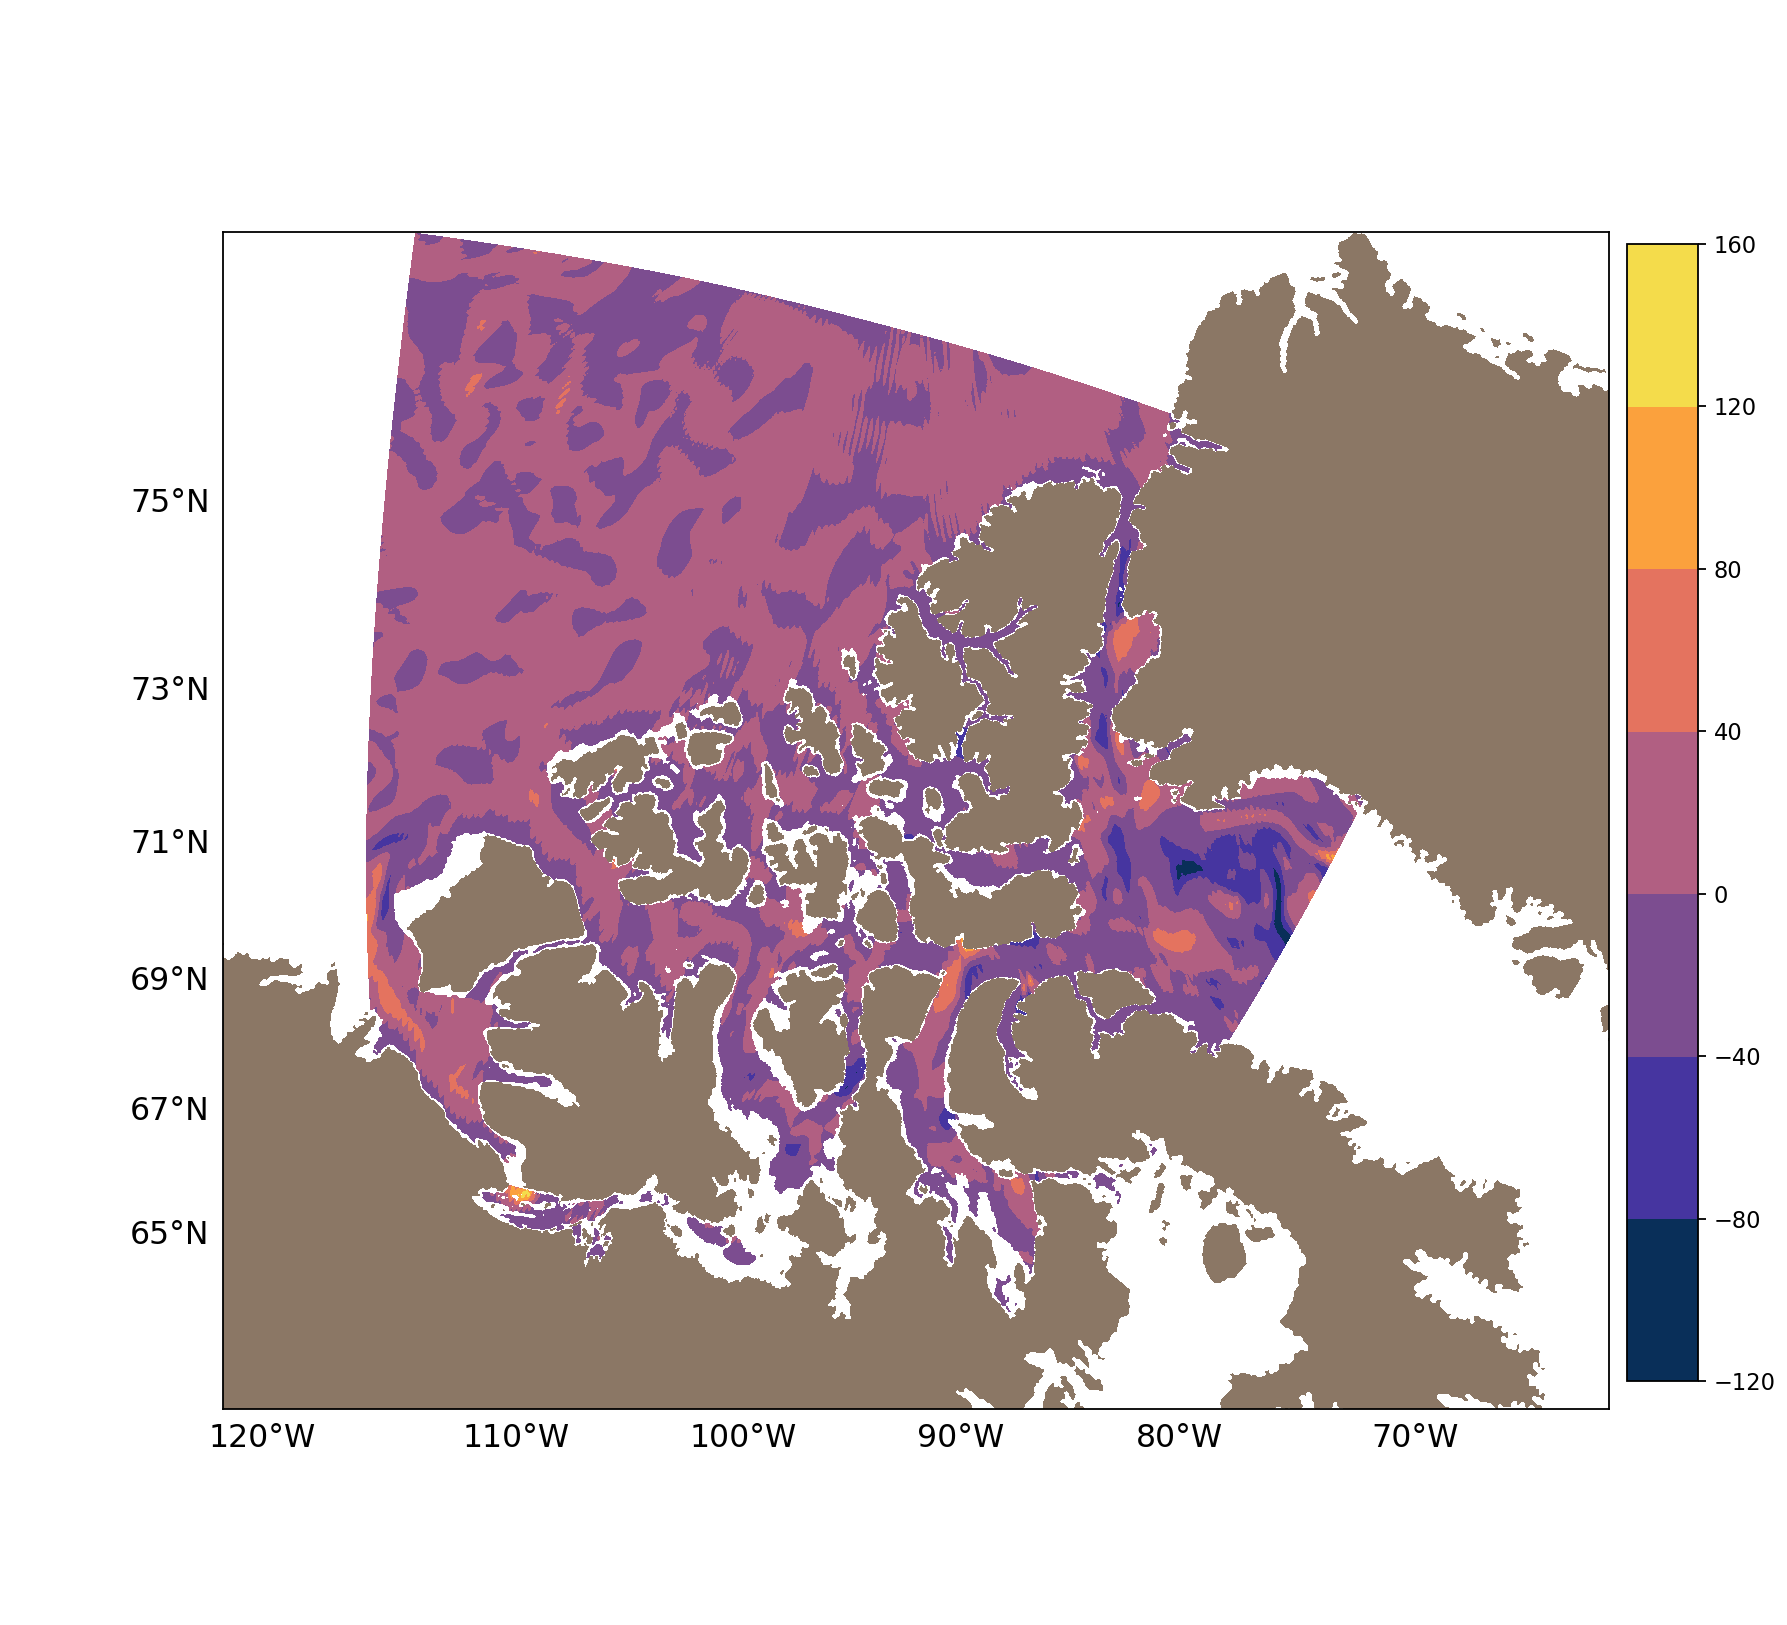

In [21]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons[1480:2050,180:820], lats[1480:2050,180:820])

var = np.ma.masked_where((tmask[20,:,:] < 0.1), dNO3[20,1480:2050,160:800]) 

cbar = proj.contourf(x, y, var*1e8, cmap=cmocean.cm.thermal, zorder=1)

fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);